# Tasca M7 T01

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier


Según el archivo wineNames.txt las columnas del dataset son las siguientes:

 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline     

Se lee el archivo de datos y se etiqueta con las columnas con nombres abreviados para facilitar el trabajo.

In [2]:
cols=['Class', 'Alcohol', 'Malic a.', 'Ash', 'Alc. of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonfl. phenols', 'Proanthocyanins', 'Col. intensity', 'Hue', 'OD', 'Proline']
df=pd.read_csv("wineData.txt", names=cols)
df.head()

,Class,Alcohol,Malic a.,Ash,Alc. of ash,Magnesium,Total phenols,Flavanoids,Nonfl. phenols,Proanthocyanins,Col. intensity,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Antes de empezar a analizar separaremos los datos de text para que no se nos filtre nada durante el análisis. Empezaremos por separar el target de las variables independientes.

In [3]:
X=df.drop('Class', axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Ahora que ya están los datos de test separados empezaremos con el análisis de los datos de train

In [4]:
#Sacamos el target de la lista de columnas
cols.pop(0)
df_train=pd.DataFrame(X_train, columns=cols)
df_train.head(5)

,Alcohol,Malic a.,Ash,Alc. of ash,Magnesium,Total phenols,Flavanoids,Nonfl. phenols,Proanthocyanins,Col. intensity,Hue,OD,Proline
94,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345
80,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530
149,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [5]:
df_train.isna().sum()

Alcohol            0
Malic a.           0
Ash                0
Alc. of ash        0
Magnesium          0
Total phenols      0
Flavanoids         0
Nonfl. phenols     0
Proanthocyanins    0
Col. intensity     0
Hue                0
OD                 0
Proline            0
dtype: int64

In [6]:
df_train.isnull().sum()

Alcohol            0
Malic a.           0
Ash                0
Alc. of ash        0
Magnesium          0
Total phenols      0
Flavanoids         0
Nonfl. phenols     0
Proanthocyanins    0
Col. intensity     0
Hue                0
OD                 0
Proline            0
dtype: int64

Vemos que no hay ningún valor Null ni NaN, así que no se requiere limpiar los mismos.

In [7]:
df_train.describe()

,Alcohol,Malic a.,Ash,Alc. of ash,Magnesium,Total phenols,Flavanoids,Nonfl. phenols,Proanthocyanins,Col. intensity,Hue,OD,Proline
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,13.006541,2.272556,2.351053,19.512030,99.646617,2.302331,2.028271,0.356617,1.605639,5.062556,0.955308,2.625865,737.857143
std,0.832253,1.105975,0.267498,3.304016,14.332732,0.645638,1.008595,0.123772,0.595531,2.343858,0.234293,0.742174,316.895264
min,11.030000,0.740000,1.360000,10.600000,78.000000,1.100000,0.470000,0.130000,0.410000,1.900000,0.540000,1.270000,278.000000
25%,12.360000,1.570000,2.210000,17.000000,88.000000,1.700000,1.200000,0.260000,1.220000,3.080000,0.760000,1.830000,495.000000
50%,12.990000,1.770000,2.350000,19.500000,97.000000,2.400000,2.090000,0.320000,1.560000,4.800000,0.960000,2.780000,660.000000
75%,13.710000,2.990000,2.500000,21.500000,107.000000,2.830000,2.890000,0.430000,1.980000,6.250000,1.120000,3.210000,937.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Vemos que hay escalas bastante diferentes en las variables. Estando los valores más bajos en la variable 'Nonflavanoid phenols' y los más altos en la variable 'Proline'. Seguramente requieran de una estandarización, pero sigamos analizando primero.

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 94 to 95
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          133 non-null    float64
 1   Malic a.         133 non-null    float64
 2   Ash              133 non-null    float64
 3   Alc. of ash      133 non-null    float64
 4   Magnesium        133 non-null    int64  
 5   Total phenols    133 non-null    float64
 6   Flavanoids       133 non-null    float64
 7   Nonfl. phenols   133 non-null    float64
 8   Proanthocyanins  133 non-null    float64
 9   Col. intensity   133 non-null    float64
 10  Hue              133 non-null    float64
 11  OD               133 non-null    float64
 12  Proline          133 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 14.5 KB


Vemos que en principio todas las variables son numéricas. Pero comprobemos los valores de las variables enteras para asegurarnos de que no se trate de variables categóricas.

In [9]:
df_train['Magnesium'].value_counts()

Magnesium
88     12
86     10
96      8
101     7
98      6
102     6
85      5
94      5
108     4
89      4
107     4
97      3
112     3
90      3
95      3
111     3
84      3
80      3
116     3
110     2
118     2
113     2
87      2
104     2
106     2
91      2
103     2
127     1
100     1
115     1
124     1
139     1
123     1
121     1
117     1
105     1
92      1
126     1
93      1
120     1
119     1
122     1
151     1
99      1
78      1
81      1
136     1
82      1
162     1
Name: count, dtype: int64

In [10]:
df_train['Proline'].value_counts()

Proline
520     4
680     3
510     3
630     3
495     3
       ..
1510    1
920     1
385     1
770     1
937     1
Name: count, Length: 97, dtype: int64

La gran variedad de valores que pueden tomar ambas variables nos demuestra que realmente son variables numéricas y no categóricas, simplemente son atributos que no tienen decimales.

A continuación revisaremos la correlación entre las variables.

In [11]:
target_train=pd.DataFrame(y_train)
df_train.corrwith(target_train['Class'])

Alcohol           -0.344310
Malic a.           0.441051
Ash               -0.034993
Alc. of ash        0.514427
Magnesium         -0.194111
Total phenols     -0.721739
Flavanoids        -0.851039
Nonfl. phenols     0.479480
Proanthocyanins   -0.510716
Col. intensity     0.270943
Hue               -0.609847
OD                -0.805041
Proline           -0.614834
dtype: float64

Vemos que hay algo de correlación con la mayoría de las variables siendo las más significativas 'Flavanoids', 'OD' y 'Total phenols'. En el otro extremo tenemos la variable 'Ash' con una correlación tan baja que los datos que nos aportaría no compensarían el coste computacional de tener una variable extra. Así que la retiraremos.

In [12]:
df_train=df_train.drop('Ash', axis=1)

A continuación haremos algunas visualizaciones en busca de outliers.

<Axes: >

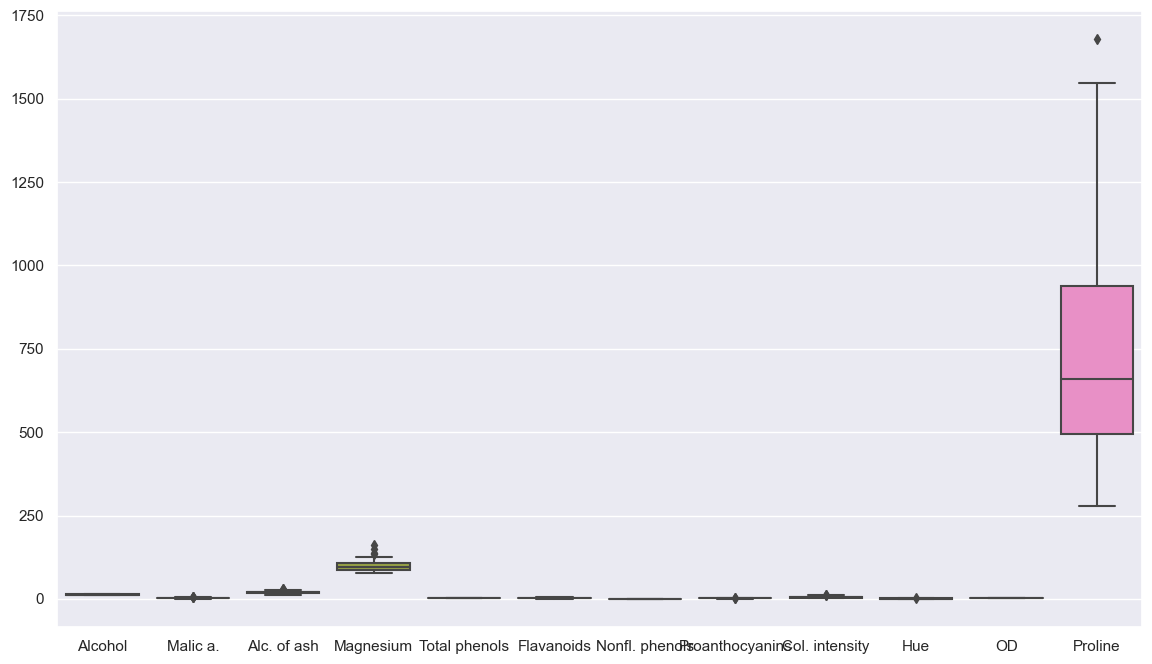

In [13]:
sns.set(rc={'figure.figsize':(14,8)})
sns.boxplot(data=df_train)

Como comentábamos la diferencia de escala de las variables Proline y Magnesium hace dificil visualizar las demás. Vamos a intentar mostrarla en gráficos separados.

<Axes: >

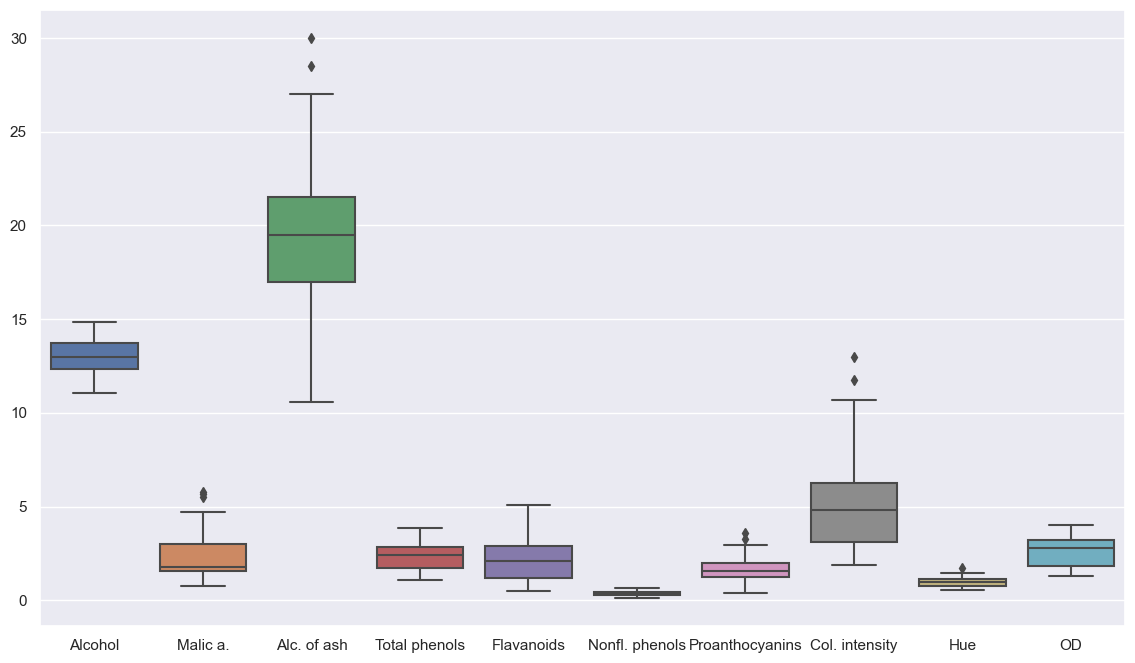

In [14]:
sns.boxplot(df_train.drop(['Proline', 'Magnesium'], axis=1))

Los datos se ven mejor pero podríamos tener una visión más clara separando también las columnas 'Alcohol' 'Alc. of Ash' i 'Col. intensity'

<Axes: >

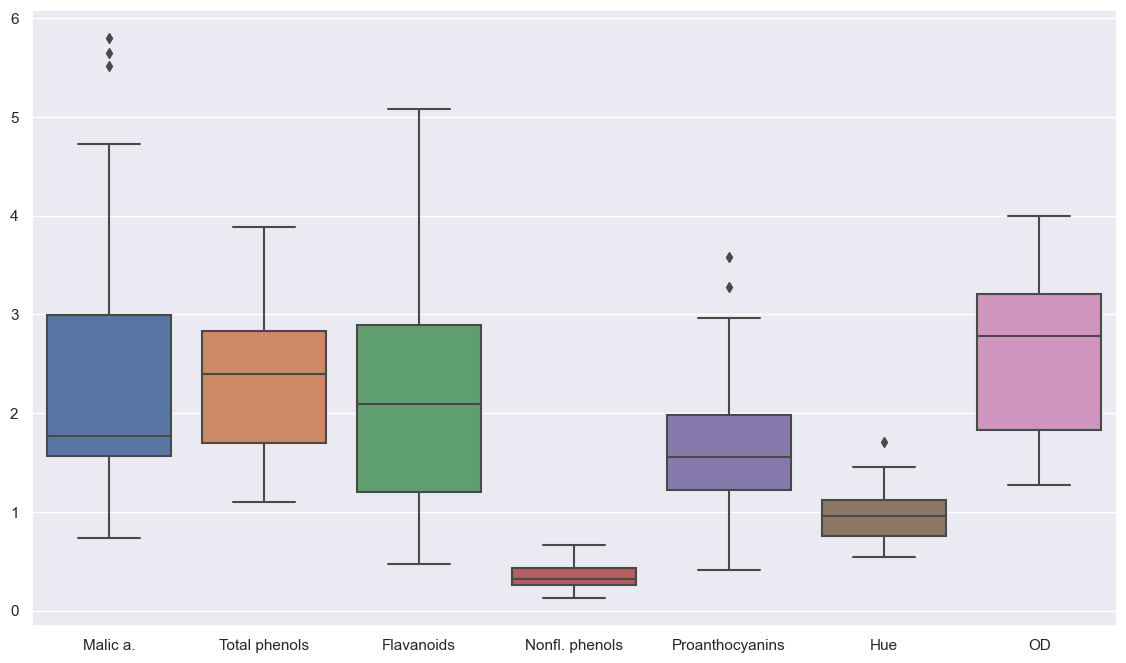

In [15]:
sns.boxplot(df_train.drop(['Alcohol', 'Alc. of ash', 'Col. intensity', 'Magnesium', 'Proline'], axis=1))

Ahora tenemos una visión mucho más clara de los datos. Podemos ver que las variables 'Malic a.', 'Proanthocyanins' y 'Hue' tienen outliers. Mientras que 'Total phenols', 'Flavanoids', 'Nonfl. phenols' y 'OD' no.

Vemos las demás variables.

<Axes: title={'center': 'Proline'}>

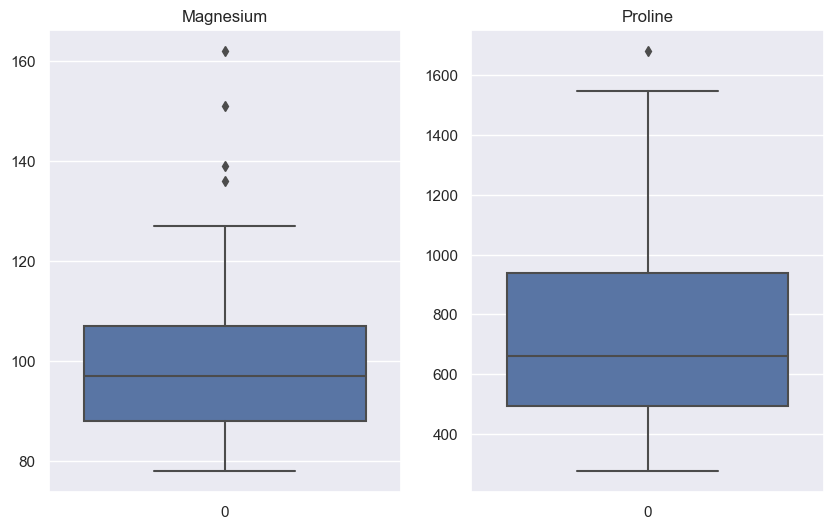

In [16]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,2, 1)
ax.set_title('Magnesium')
sns.boxplot(df_train['Magnesium'])
ax2=fig.add_subplot(1,2, 2)
ax2.set_title('Proline')
sns.boxplot(df_train['Proline'])


Tanto la viable 'Magnesium' como 'Proline' tienen outliers, teniéndolos 'Magnesium' en mayor cantidad. 

Sigamos con las últimas variables por visualizar.

<Axes: title={'center': 'Col. intensity'}>

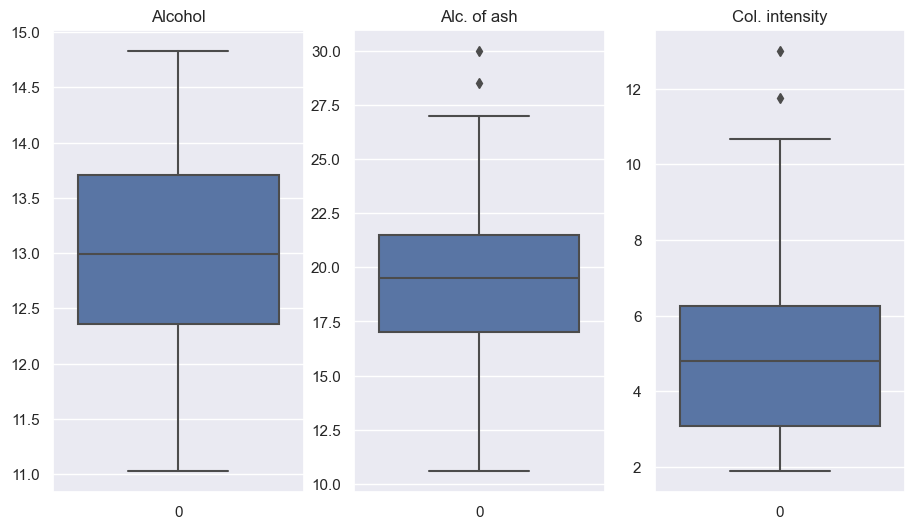

In [17]:
fig = plt.figure(figsize=(11,6))
ax=fig.add_subplot(1,3, 1)
ax.set_title('Alcohol')
sns.boxplot(df_train['Alcohol'])
ax2=fig.add_subplot(1,3, 2)
ax2.set_title('Alc. of ash')
sns.boxplot(df_train['Alc. of ash'])
ax3=fig.add_subplot(1,3, 3)
ax3.set_title('Col. intensity')
sns.boxplot(df_train['Col. intensity'])

Podemos observar como la variable 'Alcohol' no tiene outliers mientras 'Alc. of ash' y 'Col. intensity' tienen algunos.

### - Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

Los algoritmos de clasificación que he elegido son Suport Vector Machine y Decission Tree Classifier. Empezaremos por Suport Vector Machine.

Se utilizará un kernel linear y el resto de parámetros por defecto.

In [18]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

A continuación entrenaremos el Decission Tree Classifier, con todos los parámetros por defecto, así podremos usarlo de referencia cuando busquemos los mejores parámetros más adelante.

In [19]:
clf_tree = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_tree=clf_tree.predict(X_test)

### - Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.